# AE332: Modelling and Analysis Lab
## Session 3 (Part 2) : To solve Poisson and Burger Equation using the finite difference scheme
---
**Name:** Gaurav Gupta

**SC-Code:** SC21B026

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as col
from scipy.integrate import quad

## Problem 1: Poisson Equation

In [2]:
L = 1
dx = 0.2
dy = 0.2
X = np.arange(0, L+dx, dx)
Y = X
Nx, Ny = X.size, Y.size
U0 = np.zeros((Nx,Ny))
U0[0,:] = 0
U0[:,0] = 0
U0[-1,:] = Y
U0[:,-1] = X

In [3]:
def PointJacobiPossion(U0, IMAX, JMAX):
    phi = np.zeros((IMAX, JMAX, 2))
    U = np.zeros((IMAX, JMAX, 2))
    V = np.zeros((IMAX, JMAX, 2))
    while True:
        n=0
        phi[0,:, n+1] = 0
        phi[:,0, n+1] = 0
        phi[IMAX-1,:, n+1] = Y
        phi[:,JMAX-1, n+1] = X
        for j in range(1, JMAX-1):
            for i in range(1, IMAX-1):
                Z = (phi[i+1,j,n] - 4*phi[i,j,n] + phi[i-1,j,n] + phi[i,j+1,n] + phi[i,j-1,n] + 4*(X[i]**2 + Y[j]**2))
                phi[i,j,n+1] = phi[i,j,n] + 0.25*Z
                #V[i,j,n+1] = (phi[i,j,n+1]-phi[i-1,j,n+1])/dx
                #U[i,j,n+1] = -(phi[i,j,n+1]-phi[i,j-1,n+1])/dy
        error = np.sum(phi[:,:,n+1]-phi[:,:,n])
        if error<0.001:
            return phi[:,:,n+1] #, U[:,:,n+1], V[:,:,n+1] 
        phi[:,:,n]=phi[:,:,n+1]

In [4]:
U = PointJacobiPossion(U0, Nx, Ny)

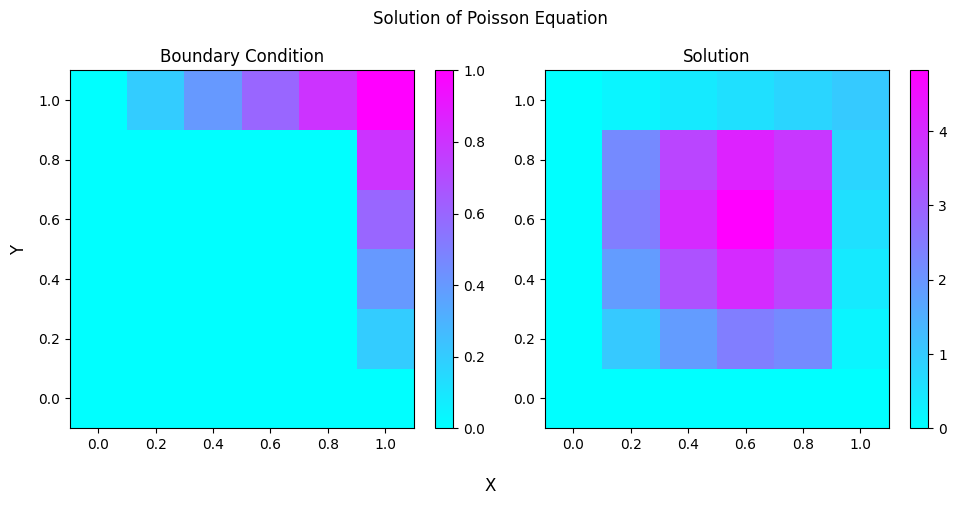

In [5]:
U = np.transpose(U)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.pcolormesh(X, Y, U0, cmap='cool')
plt.colorbar()
plt.title('Boundary Condition')

plt.subplot(1,2,2)
plt.pcolormesh(X, Y, U, cmap='cool')
plt.colorbar()
plt.title('Solution')

plt.suptitle("Solution of Poisson Equation")
plt.gcf().supxlabel('X')
plt.gcf().supylabel('Y')
plt.tight_layout()

## Problem 2: 1D Burger's Equation

In [6]:
L = 1
dx = 0.01
dt = 0.75*0.5*dx**2
X = np.arange(0, L+dx, dx)
nx = X.size
tf = 1
nu = 0.02
U0 = np.sin(np.pi*X)

In [7]:
def OneDBurger():
    t = np.arange(0, tf, dt)
    U = np.zeros((nx, t.size))
    U[:,0] = U0
    for n in range(t.size-1):
        for i in range(1, nx-2):
            U[i,n+1] = U[i,n] - dt*U[i,n]*(U[i,n]-U[i-1,n])/dx + dt*nu*(U[i+1,n]+U[i-1,n]-2*U[i,n])/dx/dx

    return U, t

In [8]:
U, t = OneDBurger()

Text(0, 0.5, 'U')

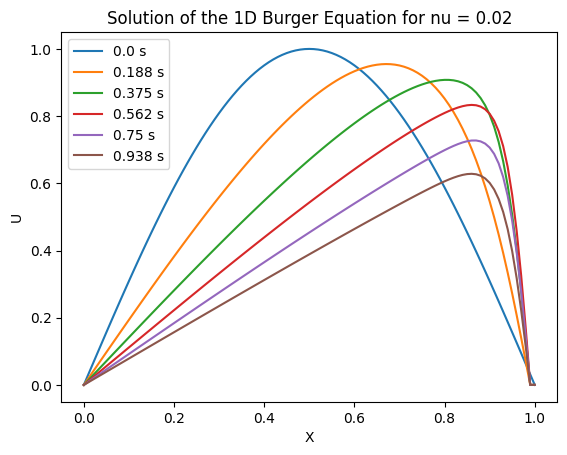

In [9]:
for i in range(0,t.size, 5000):
    plt.plot(X, U[:,i], label="{} s".format(np.round(t[i],3)))
plt.legend()
plt.title("Solution of the 1D Burger Equation for nu = 0.02")
plt.xlabel('X')
plt.ylabel('U')

### Comparision with Analytical Solution

We randomly pick a time in between 0 and 1, compare the FDM solution with the analytical solution.

In [10]:
t_random = np.random.choice(t)
UAna = np.zeros(nx)

def aN(n):
    #return np.exp(-n*x)
    if n==0:
        x2 = lambda x: np.exp((np.cos(np.pi*x)-1)/2/np.pi/nu)
    else:
        x2 = lambda x: 2 * np.exp(-1*(1-np.cos(np.pi*x))/2/np.pi/nu)*np.cos(n*np.pi*x)
    
    return x2

def Int(n):
    return quad(aN(n),0,1)

a0 = Int(0)[0]

for i in range(nx):
    num, den = 0, 0
    for n in range(1,50):
        an = Int(n)[0]
        num += an * n*np.exp(-n**2*np.pi**2*t_random*nu)*np.sin(n*np.pi*X[i])
        den += an * np.exp(-n**2*np.pi**2*t_random*nu)*np.cos(n*np.pi*X[i])
    UAna[i] = 2*np.pi*nu* num/(a0 + den)

Text(0, 0.5, 'U')

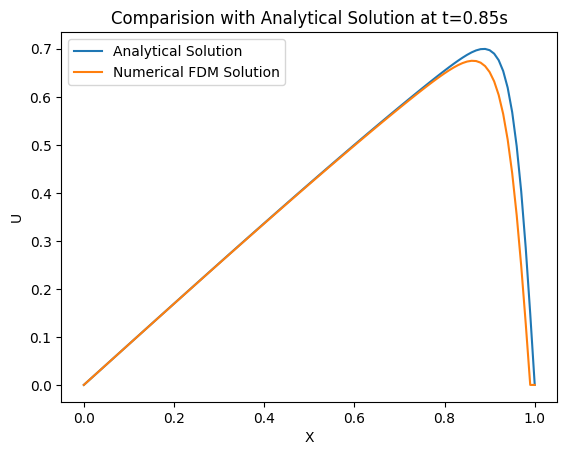

In [11]:
plt.plot(X, UAna, label='Analytical Solution')
plt.plot(X, U[:,np.where(t==t_random)[0][0]], label='Numerical FDM Solution')
plt.legend()
plt.title('Comparision with Analytical Solution at t={}s'.format(np.round(t_random,2)))
plt.xlabel('X')
plt.ylabel('U')

### Grid Convergence Study
Changing the grid size to see the effect on convergence.

Text(0, 0.5, 'U')

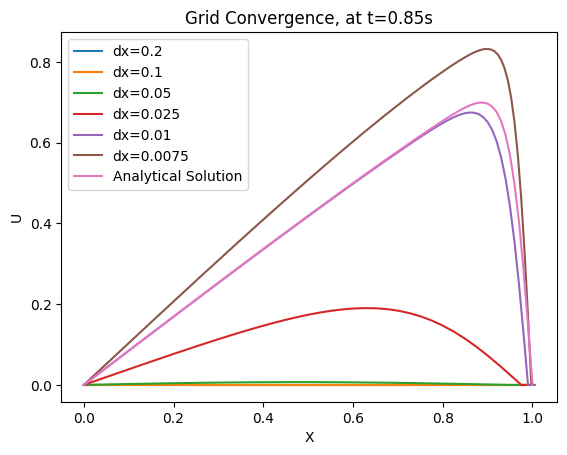

In [12]:
dxL = [0.2, 0.1, 0.05, 0.025, 0.01, 0.0075]
for m in dxL:
    X1 = np.arange(0, L+m, m)
    nx = X1.size
    U0 = np.sin(np.pi*X1)
    U, t2 = OneDBurger()
    idx = (np.abs(t2 - t_random)).argmin()
    plt.plot(X1, U[:,idx], label='dx={}'.format(m))

plt.plot(X, UAna, label='Analytical Solution')
plt.legend()
plt.title('Grid Convergence, at t={}s'.format(np.round(t_random,2)))
plt.xlabel('X')
plt.ylabel('U')

From the above graph, we observe that dx=0.01 gives best result among the selected grid sizes. 

### Time Convergence Study

Text(0, 0.5, 'U')

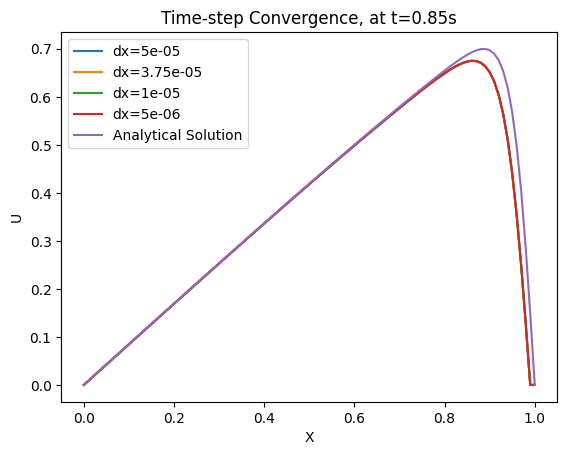

In [13]:
dtL = [5e-5, 3.75e-5, 1e-5, 5e-6]
U0 = np.sin(np.pi*X)
nx = X.size
for m in dtL:
    dt=m
    U, t2 = OneDBurger()
    idx = (np.abs(t2 - t_random)).argmin()
    plt.plot(X, U[:,idx], label='dx={}'.format(m))

plt.plot(X, UAna, label='Analytical Solution')
plt.legend()
plt.title('Time-step Convergence, at t={}s'.format(np.round(t_random,2)))
plt.xlabel('X')
plt.ylabel('U')

From the above graph, we observe that change in the timestep doesn't cause much change in the solution. Thus, a convergence is acheived and any of the selected values can be used for computation.

## Problem 3: 2D linear convection

In [14]:
nx = ny = 21
L = 2
nt = 51
Tf = 0.5
t = np.linspace(0, Tf, nt)
X = Y = np.linspace(0, L, nx)
dx = L/(nx-1)
dy = L/(ny-1)
dt = Tf/(nt-1)

In [15]:
U0 = V0 = np.ones((nx,ny))
U0[6:11, 6:11] = 2
V0[6:11, 6:11] = 2

In [16]:
def twoDLinearConvection():
    U = np.zeros((nx, ny, nt))
    V = np.zeros((nx, ny, nt))
    U[:, :, 0] = U0
    V[:, :, 0] = V0
    U[0, :, :] = 1
    U[-1, :, :] = 1
    U[:, 0 , :] = 1
    U[:, -1, :] = 1
    V[0, :, :] = 1
    V[-1, :, :] = 1
    V[:, 0 , :] = 1
    V[:, -1, :] = 1
    for n in range(0, nt-1):
        for i in range(1,nx-1):
            for j in range(1, ny-1):
                U[i,j,n+1] = U[i,j,n] - dt*(U[i,j,n]-U[i-1,j,n])/dx - dt*(U[i,j,n]-U[i,j-1,n])/dy
                V[i,j,n+1] = V[i,j,n] - dt*(V[i,j,n]-V[i-1,j,n])/dx - dt*(V[i,j,n]-V[i,j-1,n])/dy                
    return U, V

In [17]:
U, V = twoDLinearConvection()

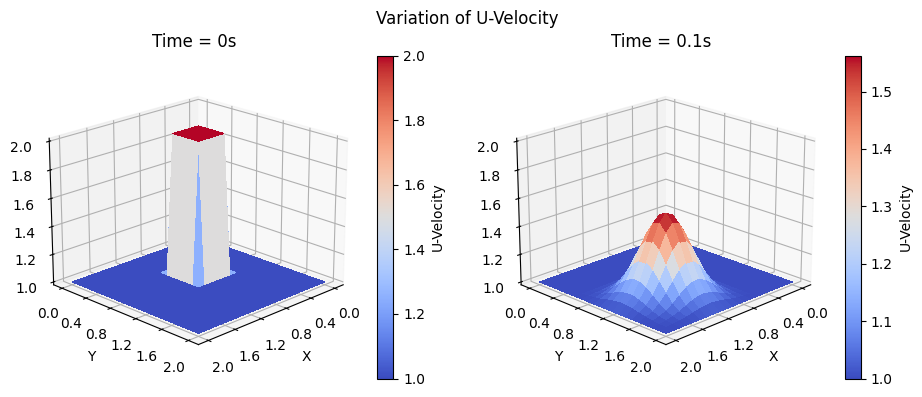

In [18]:
fig = plt.figure(figsize=(9.5,4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
Xdata, Ydata = np.meshgrid(X,Y)
surf = ax.plot_surface(Xdata, Ydata, U[:,:,0], cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.colorbar(surf, label='U-Velocity')
ax.set_zlim3d(1,2)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_xticks([0,0.4,0.8, 1.2, 1.6, 2])
ax.set_yticks([0,0.4,0.8, 1.2, 1.6, 2])
ax.view_init(20,45,0)
plt.title('Time = 0s')
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(Xdata, Ydata, U[:,:,50], cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.colorbar(surf, label='U-Velocity')
ax.set_zlim3d(1,2)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_xticks([0,0.4,0.8, 1.2, 1.6, 2])
ax.set_yticks([0,0.4,0.8, 1.2, 1.6, 2])
ax.view_init(20,45,0)
plt.title('Time = 0.1s')
plt.suptitle("Variation of U-Velocity")
plt.tight_layout()

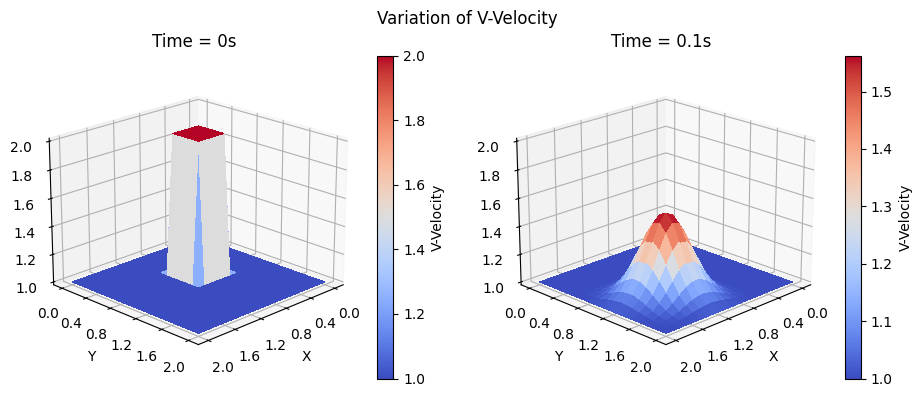

In [19]:
fig = plt.figure(figsize=(9.5,4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
Xdata, Ydata = np.meshgrid(X,Y)
surf = ax.plot_surface(Xdata, Ydata, V[:,:,0], cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.colorbar(surf, label='V-Velocity')
ax.set_zlim3d(1,2)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_xticks([0,0.4,0.8, 1.2, 1.6, 2])
ax.set_yticks([0,0.4,0.8, 1.2, 1.6, 2])
ax.view_init(20,45,0)
plt.title('Time = 0s')
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_surface(Xdata, Ydata, V[:,:,50], cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.colorbar(surf, label='V-Velocity')
ax.set_zlim3d(1,2)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_xticks([0,0.4,0.8, 1.2, 1.6, 2])
ax.set_yticks([0,0.4,0.8, 1.2, 1.6, 2])
ax.view_init(20,45,0)
plt.title('Time = 0.1s')
plt.suptitle("Variation of V-Velocity")
plt.tight_layout()